# Regresja liniowa

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [10]:
X = np.random.normal(0, 10, [100, 1])
y = 2 * X + 5 + np.random.normal(0, 5, [100, 1])

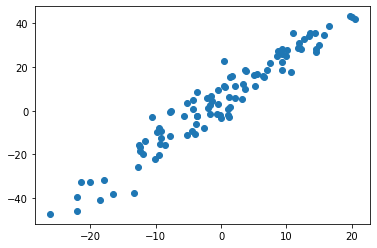

In [11]:
plt.scatter(X, y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
predicted = lm.predict(X_test)
print(mse(predicted, y_test), mse(lm.predict(X_train), y_train))
print(mae(predicted, y_test), mae(lm.predict(X_train), y_train))

13.304558101923316 37.596168082106644
2.8986413943215212 4.976493513617684


In [15]:
print(lm.coef_, lm.intercept_)

[[1.98771585]] [5.01717791]


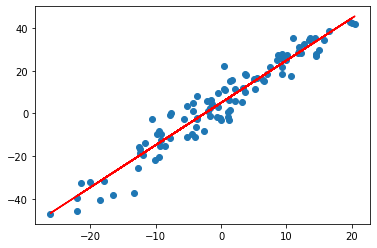

In [16]:
plt.scatter(X, y)
plt.plot(X, lm.predict(X), color='red')

# Regresja Ridge i Lasso

In [17]:
from sklearn.datasets import make_regression

In [97]:
X, y = make_regression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
X.shape

(100, 100)

In [23]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
show_results(lm2, X_train, y_train, X_test, y_test)

LinearRegression()

In [44]:
def show_results(model, X_train, y_train, X_test, y_test):
    predicted_test = model.predict(X_test)
    predicted_train = model.predict(X_train)
    print("Błąd średniokwadratowy na zbiorze treningowym wynosi:",
          mse(predicted_train, y_train),
          "\nBłąd średniokwadratowy na zbiorze testowym wynosi:",
          mse(predicted_test, y_test),
          "\nBłąd średniokwadratowy na zbiorze treningowym wynosi:",
          mae(predicted_train, y_train),
          "\nBłąd średniokwadratowy na zbiorze testowym wynosi:",
          mae(predicted_test, y_test))

In [293]:
from sklearn.linear_model import Ridge
lm_ridge = Ridge()
lm_ridge.fit(X_train, y_train)
show_results(lm_ridge, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 57.643159057438936 
Błąd średniokwadratowy na zbiorze testowym wynosi: 60.8553243220944 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 48.489347567960664 
Błąd średniokwadratowy na zbiorze testowym wynosi: 49.99374270034707


In [48]:
from sklearn.linear_model import Lasso
lm_lasso = Lasso()
lm_lasso.fit(X_train, y_train)
show_results(lm_lasso, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 14.259507185392273 
Błąd średniokwadratowy na zbiorze testowym wynosi: 26.32195064218274 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 3.0704186793197117 
Błąd średniokwadratowy na zbiorze testowym wynosi: 4.019266339509533


# Regresja liniowa na realnych danych

In [256]:
from sklearn.datasets import load_diabetes

In [257]:
X = load_diabetes()
X.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [258]:
print(X.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [259]:
import pandas as pd
pd.DataFrame(X.data, columns=X.feature_names).describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


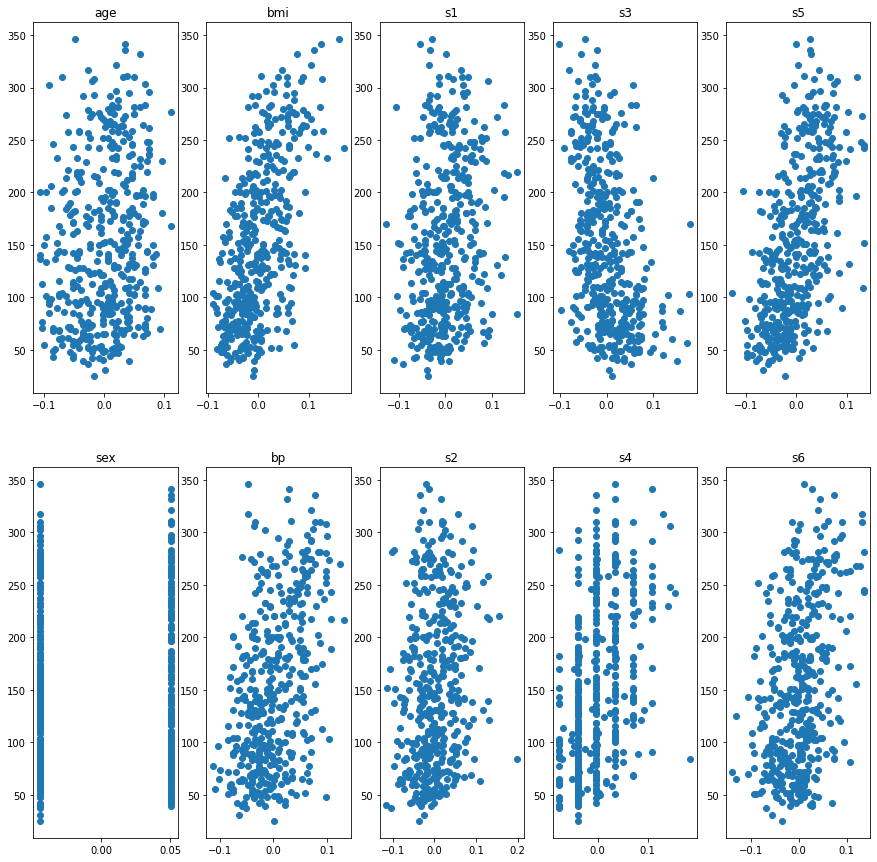

In [263]:
fig, axs = plt.subplots(2, 5, figsize=(15,15))
for i in range(10):
    axs[i % 2, i // 2].scatter(X.data[:, i], X.target)
    axs[i % 2, i // 2].set_title(X.feature_names[i])

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X.data, X.target)
lm_diabetes = LinearRegression()
lm_diabetes.fit(X_train, y_train)
show_results(lm_diabetes, X_train, y_train, X_test, y_test)
print(*lm_diabetes.coef_)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 52.54298384904315 
Błąd średniokwadratowy na zbiorze testowym wynosi: 57.95465867960687 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 42.5250438249741 
Błąd średniokwadratowy na zbiorze testowym wynosi: 47.06947762807068
-72.27020513051586 -156.05914536393902 529.1948927247805 226.40085910190538 -879.0385157870991 499.17784291883606 109.52982658287202 110.56065214330279 864.3103181121841 119.60931331784573


In [268]:
lm_lasso_diabetes = Lasso(alpha=0.5)
lm_lasso_diabetes.fit(X_train, y_train)
show_results(lm_lasso_diabetes, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 57.013768206310175 
Błąd średniokwadratowy na zbiorze testowym wynosi: 58.775204054707885 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 47.992878443540484 
Błąd średniokwadratowy na zbiorze testowym wynosi: 48.391930789890274


In [267]:
lm_ridge_diabetes = Ridge()
lm_ridge_diabetes.fit(X_train, y_train)
show_results(lm_ridge_diabetes, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 58.53226926231524 
Błąd średniokwadratowy na zbiorze testowym wynosi: 58.14093727988101 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 49.28831547437414 
Błąd średniokwadratowy na zbiorze testowym wynosi: 48.09782964599856


In [270]:
from sklearn.linear_model import LassoCV

lm_lassoCV_diabetes = LassoCV()
lm_lassoCV_diabetes.fit(X_train, y_train)
print('Best alpha: %.2f' % lm_lassoCV_diabetes.alpha_)
show_results(lm_lassoCV_diabetes, X_train, y_train, X_test, y_test)

Best alpha: 0.05
Błąd średniokwadratowy na zbiorze treningowym wynosi: 53.57559497914908 
Błąd średniokwadratowy na zbiorze testowym wynosi: 54.57163103409095 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 43.8869245779269 
Błąd średniokwadratowy na zbiorze testowym wynosi: 43.16209719483402


In [287]:
from sklearn.neural_network import MLPRegressor

mlp_diabetes = MLPRegressor(solver='lbfgs', max_iter=1000000) # , activation='tanh'
mlp_diabetes.fit(X_train, y_train)
show_results(mlp_diabetes, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 49.93446744050141 
Błąd średniokwadratowy na zbiorze testowym wynosi: 56.56474944096024 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 39.953056137557155 
Błąd średniokwadratowy na zbiorze testowym wynosi: 45.89246970647442


# Regresja wielomianowa

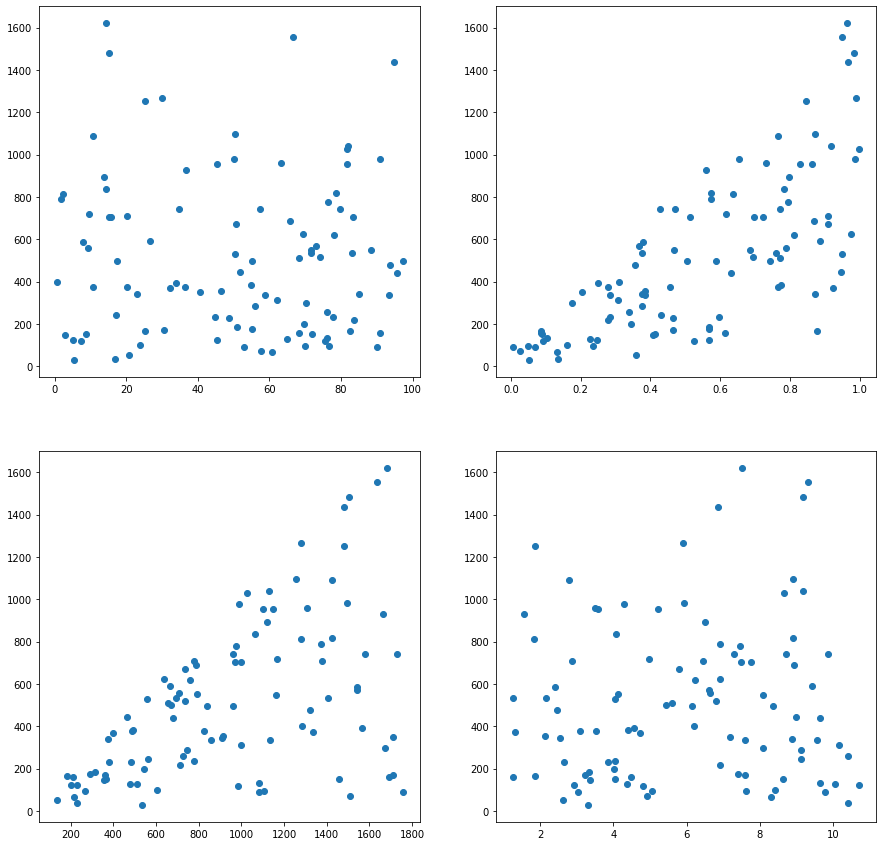

In [301]:
from sklearn.datasets import make_friedman2

X, y = make_friedman2()
X_train, X_test, y_train, y_test = train_test_split(X, y)
fig, axs = plt.subplots(2, 2, figsize=(15,15))
for i in range(4):
    axs[i % 2, i // 2].scatter(X[:, i], y)

In [302]:
lm_friedman = LinearRegression()
lm_friedman.fit(X_train, y_train)
show_results(lm_friedman, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 119.70718257621743 
Błąd średniokwadratowy na zbiorze testowym wynosi: 142.19755536660108 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 90.68914042922108 
Błąd średniokwadratowy na zbiorze testowym wynosi: 107.33143730291744


In [303]:
lm_ridge_friedman = Ridge()
lm_ridge_friedman.fit(X_train, y_train)
show_results(lm_ridge_friedman, X_train, y_train, X_test, y_test)
print('\n')
lm_lasso_friedman = Lasso()
lm_lasso_friedman.fit(X_train, y_train)
show_results(lm_lasso_friedman, X_train, y_train, X_test, y_test)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 126.60284123619606 
Błąd średniokwadratowy na zbiorze testowym wynosi: 145.17655370318843 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 91.59120041353196 
Błąd średniokwadratowy na zbiorze testowym wynosi: 107.91834319249305


Błąd średniokwadratowy na zbiorze treningowym wynosi: 119.759731805848 
Błąd średniokwadratowy na zbiorze testowym wynosi: 141.9425231698482 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 90.44699436058872 
Błąd średniokwadratowy na zbiorze testowym wynosi: 107.32133292971386


In [306]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pr = Pipeline([
    ('preprocess', PolynomialFeatures()),
    ('lasso', Lasso())
])
pr.fit(X_train, y_train)
show_results(pr, X_train, y_train, X_test, y_test)

print('\n', *pr['lasso'].coef_)

Błąd średniokwadratowy na zbiorze treningowym wynosi: 6.47953275951668 
Błąd średniokwadratowy na zbiorze testowym wynosi: 6.010299101807099 
Błąd średniokwadratowy na zbiorze treningowym wynosi: 4.074974019210739 
Błąd średniokwadratowy na zbiorze testowym wynosi: 4.54086041644315

 0.0 0.3184615608230174 -0.016986533299520816 0.0 0.0 0.002092817527083973 -6.649450937651455e-06 -0.4493302987240816 -0.014619743391995205 1.1523433816212594e-05 0.9973405534226248 -0.0012249271115955475 0.0 1.3544474956307717 0.07258615609717604


# Dekompozycja błędu średniokwadratowego

In [313]:
from mlxtend.evaluate import bias_variance_decomp
model = Ridge()
mean_se, bias, var = bias_variance_decomp(
    model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1
)
print('MSE: %.3f' % mean_se)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 22985.714
Bias: 21419.905
Variance: 1565.809


# Zadanie domowe
- załaduj zbiór danych "California housing".
- przedstaw dane na wykresach (dowolnych!!! - ważne żeby były pomocne).
- dopasuj model regresji liniowej.
- dopasuj model liniowy z regularyzacją Ridge i Lasso. Znajdź hiperparametry przy pomocy walidacji krzyżowej.
- dopasuj model regresji wielomianowej.
- dopasuj model sieci neuronowej. Postaraj się znaleźć najlepsze hiperparametry.